## Exploring Seaborn's Scatterplots

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)

import numpy as np

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "darkgrid")

#https://stackoverflow.com/questions/35042255/how-to-plot-multiple-seaborn-jointplot-in-subplot
import sys
sys.path.append(".")
import SeabornFig2Grid as sfg

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [3]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
df.shape

(344, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
print(df['species'].value_counts())
print(df['island'].value_counts())
print(df['sex'].value_counts())

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64
Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64
Male      168
Female    165
Name: sex, dtype: int64


In [7]:
df.isna().sum().sort_values(ascending = False)

sex                  11
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
species               0
island                0
dtype: int64

In [8]:
df.dropna(inplace = True)

In [9]:
df.shape

(333, 7)

In [10]:
# df = pd.get_dummies(df, 
#                     columns = ['species', 'island', 'sex'],
#                     drop_first = True)

In [11]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [13]:
#very basic EDA
df.groupby('sex').mean()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
sex,,,,
Female,42.096970,16.425455,197.363636,3862.272727
Male,45.854762,17.891071,204.505952,4545.684524


In [16]:
df.groupby('sex').min()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
sex,,,,,,
Female,Adelie,Biscoe,32.1,13.1,172.0,2700.0
Male,Adelie,Biscoe,34.6,14.1,178.0,3250.0


In [17]:
df.groupby('sex').max()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
sex,,,,,,
Female,Gentoo,Torgersen,58.0,20.7,222.0,5200.0
Male,Gentoo,Torgersen,59.6,21.5,231.0,6300.0


In [18]:
df.describe().drop('count').round(2).T

,mean,std,min,25%,50%,75%,max
bill_length_mm,43.99,5.47,32.1,39.5,44.5,48.6,59.6
bill_depth_mm,17.16,1.97,13.1,15.6,17.3,18.7,21.5
flipper_length_mm,200.97,14.02,172.0,190.0,197.0,213.0,231.0
body_mass_g,4207.06,805.22,2700.0,3550.0,4050.0,4775.0,6300.0


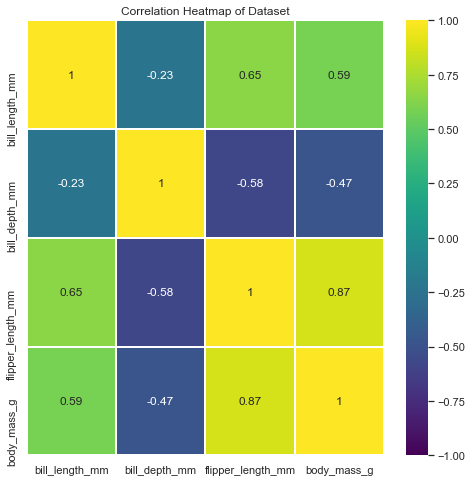

In [19]:
plt.figure(figsize = (8, 8))
sns.heatmap(df.corr(),
            vmin = -1, 
            vmax = 1,
            cmap = 'viridis',
            annot = True,
            linewidths = 1)
plt.title('Correlation Heatmap of Dataset');

<Figure size 576x576 with 0 Axes>

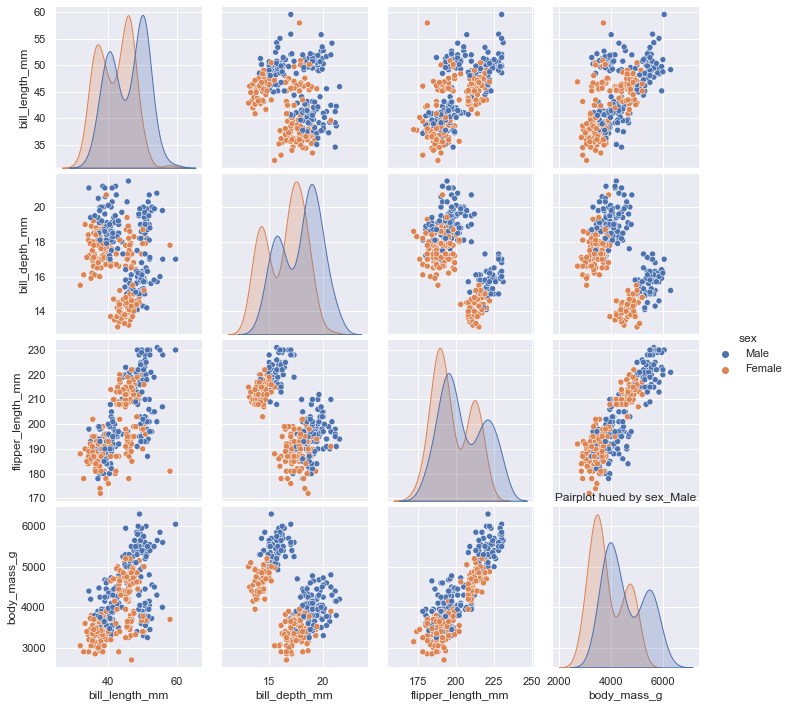

In [21]:
plt.figure(figsize = (8, 8));
sns.pairplot(df, hue = 'sex')
plt.title('Pairplot hued by sex_Male');

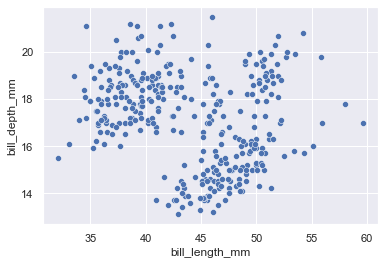

In [22]:
sns.scatterplot(data = df, 
                x = 'bill_length_mm', 
                y = 'bill_depth_mm');

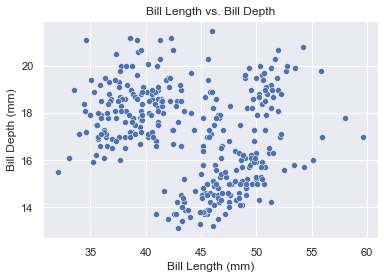

In [23]:
#https://www.statology.org/seaborn-title/
sns.scatterplot(data = df, 
                x = 'bill_length_mm', 
                y = 'bill_depth_mm').set(title = 'Bill Length vs. Bill Depth',
                                         xlabel = 'Bill Length (mm)',
                                         ylabel = 'Bill Depth (mm)');

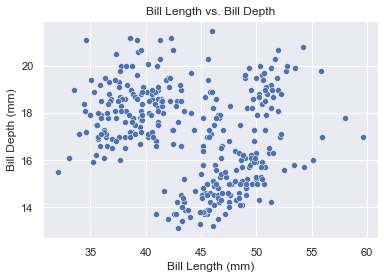

In [24]:
#https://stackoverflow.com/questions/42406233/how-to-add-title-to-seaborn-boxplot
plot = sns.scatterplot(data = df, 
                x = 'bill_length_mm', 
                y = 'bill_depth_mm')
plot.set_title('Bill Length vs. Bill Depth')
plot.set_xlabel('Bill Length (mm)')
plot.set_ylabel('Bill Depth (mm)');

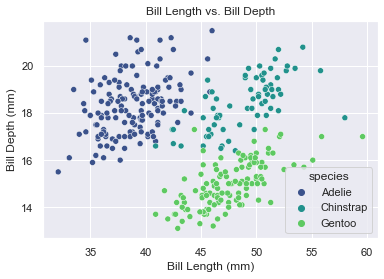

In [29]:
plot = sns.scatterplot(data = df, 
                       x = 'bill_length_mm', 
                       y = 'bill_depth_mm',
                       hue = 'species',
                       palette = 'viridis')
plot.set_title('Bill Length vs. Bill Depth')
plot.set_xlabel('Bill Length (mm)')
plot.set_ylabel('Bill Depth (mm)');

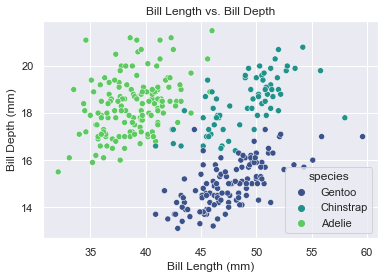

In [42]:
order_hue = ['Gentoo', 'Chinstrap', 'Adelie']

plot = sns.scatterplot(data = df, 
                       x = 'bill_length_mm', 
                       y = 'bill_depth_mm',
                       hue = 'species',
                       palette = 'viridis',
                       hue_order = order_hue)
plot.set_title('Bill Length vs. Bill Depth')
plot.set_xlabel('Bill Length (mm)')
plot.set_ylabel('Bill Depth (mm)');

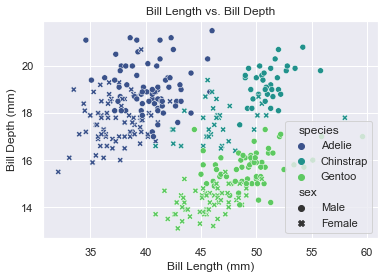

In [32]:
plot = sns.scatterplot(data = df, 
                       x = 'bill_length_mm', 
                       y = 'bill_depth_mm',
                       hue = 'species',
                       style = 'sex',
                       palette = 'viridis')
plot.set_title('Bill Length vs. Bill Depth')
plot.set_xlabel('Bill Length (mm)')
plot.set_ylabel('Bill Depth (mm)');

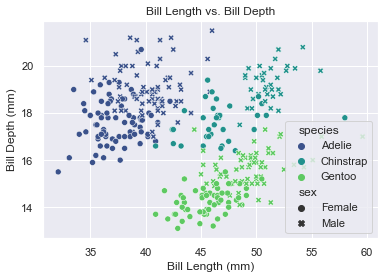

In [44]:
order_style = ['Female', 'Male'] 

plot = sns.scatterplot(data = df, 
                       x = 'bill_length_mm', 
                       y = 'bill_depth_mm',
                       hue = 'species',
                       style = 'sex',
                       palette = 'viridis',
                       style_order = order_style)
plot.set_title('Bill Length vs. Bill Depth')
plot.set_xlabel('Bill Length (mm)')
plot.set_ylabel('Bill Depth (mm)');

In [33]:
#maybe touch on https://stackoverflow.com/questions/54682473/change-legend-location-and-labels-in-seaborn-scatter-plot

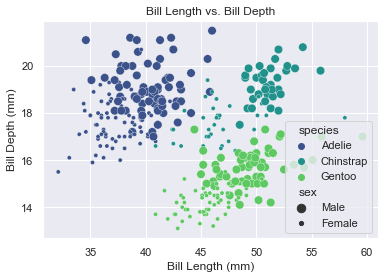

In [34]:
plot = sns.scatterplot(data = df, 
                       x = 'bill_length_mm', 
                       y = 'bill_depth_mm',
                       hue = 'species',
                       size = 'sex',
                       palette = 'viridis')
plot.set_title('Bill Length vs. Bill Depth')
plot.set_xlabel('Bill Length (mm)')
plot.set_ylabel('Bill Depth (mm)');

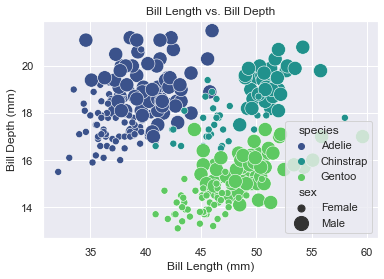

In [51]:
#https://stackoverflow.com/questions/59953855/seaborn-scatterplot-scale-bubble-size-to-larger-dots
plot = sns.scatterplot(data = df, 
                       x = 'bill_length_mm', 
                       y = 'bill_depth_mm',
                       hue = 'species',
                       size = 'sex',
                       sizes = [50, 200],
                       size_order = order_style,
                       palette = 'viridis')
plot.set_title('Bill Length vs. Bill Depth')
plot.set_xlabel('Bill Length (mm)')
plot.set_ylabel('Bill Depth (mm)');

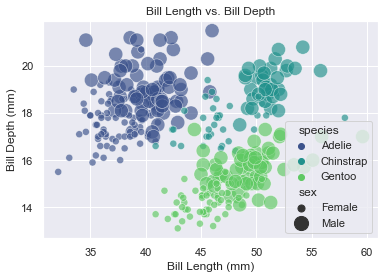

In [53]:
plot = sns.scatterplot(data = df, 
                       x = 'bill_length_mm', 
                       y = 'bill_depth_mm',
                       hue = 'species',
                       size = 'sex',
                       sizes = [50, 200],
                       size_order = order_style,
                       palette = 'viridis',
                       alpha = 0.66)
plot.set_title('Bill Length vs. Bill Depth')
plot.set_xlabel('Bill Length (mm)')
plot.set_ylabel('Bill Depth (mm)');

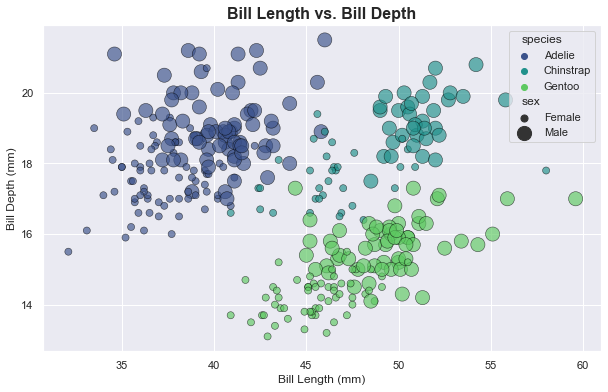

In [69]:
plt.figure(figsize = (10, 6))
plot = sns.scatterplot(data = df, 
                       x = 'bill_length_mm', 
                       y = 'bill_depth_mm',
                       hue = 'species',
                       size = 'sex',
                       sizes = [50, 200],
                       size_order = order_style,
                       palette = 'viridis',
                       alpha = 0.66,
                       edgecolor = 'black')
plot.set_title('Bill Length vs. Bill Depth', fontsize = 16, fontweight = 'bold')
plot.set_xlabel('Bill Length (mm)')
plot.set_ylabel('Bill Depth (mm)');